In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

In [5]:
# the digits dataset of 8x8 pixel image of digits 
# that consist in training and target datasets.

digits = datasets.load_digits()
n_samples = len(digits.images)
dimention = digits.images[0].shape
print("The number of samples in digits dataset is {0:d}, the dimentoin of each image is {1:d}x{1:d}".format(n_samples,dimention[0]))

The number of samples in digits dataset is 1797, the dimentoin of each image is 8x8


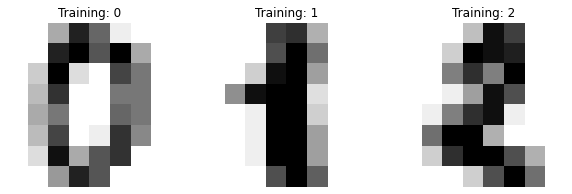

In [7]:
#show the first 3 images
_, fig = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
for ax, image, label in zip(fig, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Training: %i" % label)

In [8]:
# reshape the images into a vector Nx1

data = digits.images.reshape((n_samples,-1))

x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False, random_state=42)


In [10]:
# Train the model MLPC using the training subset
model = MLPClassifier(solver="adam", hidden_layer_sizes=(10,12),random_state=1, max_iter=600)

model.fit(x_train,y_train)
classification_results = model.predict(x_test)

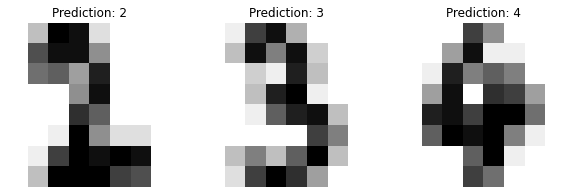

In [12]:
_, fig = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
for ax, image, label in zip(fig, x_test, classification_results):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Prediction: %i" % label)

In [13]:
print(metrics.classification_report(y_test,classification_results))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.76      0.78      0.77        36
           2       0.91      0.91      0.91        35
           3       0.91      0.84      0.87        37
           4       0.89      0.92      0.91        37
           5       0.83      0.95      0.89        37
           6       0.94      0.92      0.93        37
           7       0.94      0.83      0.88        36
           8       0.81      0.76      0.78        33
           9       0.78      0.86      0.82        37

    accuracy                           0.88       360
   macro avg       0.88      0.87      0.87       360
weighted avg       0.88      0.88      0.88       360

